---
<center>

  # **Tarea 02**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

In [1]:
# Librerias a importar
import numpy as np
import matplotlib.pyplot as plt

# 1.

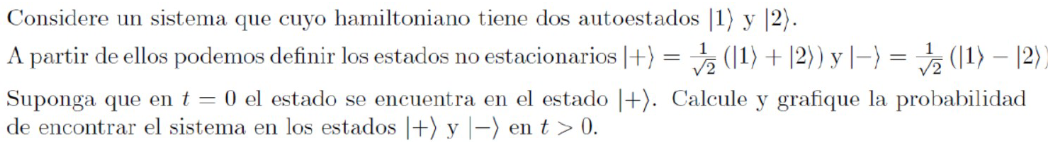

Definicion de los estados no estacionarios: 

$\ket{+} =  \frac{1}{\sqrt{2}} (\ket{1} + \ket{2})$

$\ket{-} =  \frac{1}{\sqrt{2}} (\ket{1} - \ket{2})$

Partiendo del timepo $t=0$ vemos que el sistema se encuentra en el estado $\ket{+}$. Es importante notar que los autoestados del Hamiltoniano $\ket{1}$ tiene una energía relacionada la cual va a ser $E_1$, lo mismo ocurre con en el auto estado $\ket{2}$, el cual tiene una energía de $E_2$.

Para la evolución temporal de cada uno de los autoestados tenemos que:

* $\ket{1, t} = e^{-iE_1t/\hbar} \ket{1,0}$
* $\ket{2, t} = e^{-iE_2t/\hbar} \ket{2,0}$

In [2]:
# Definición de los autoestados del Hamiltoniano
estado_uno = np.array([1,0])                            # Vector del autoestado 1
estado_dos = np.array([0,1])                            # Vector del autoestado 2

energia_uno = 1                                         # Energía del autoestado uno
energia_dos = -1                                        # Energía del auto estado dos

hbar = 1    

# Variable temporal
t = np.linspace(0,10, 1000)

# Evolución temporal de los autoestados
temporal_uno = np.exp(-1j*energia_uno*t[0]/hbar)
temporal_dos = np.exp(-1j*energia_dos*t[0]/hbar)

# Definición de los estados no estacionarios
estado_mas = 1/np.sqrt(2) * (estado_uno + estado_dos)
estado_menos = 1/np.sqrt(2) * (estado_uno - estado_dos)

print(f"Los estados estacionarios se definen como: \n- Estado mas: {estado_mas}\n- Estado menos: {estado_menos}")

Los estados estacionarios se definen como: 
- Estado mas: [0.70710678 0.70710678]
- Estado menos: [ 0.70710678 -0.70710678]


Para calcular la probabilidad de encontrar un sistema en los estados $\ket{+}$ y $\ket{-}$ en un timepo $t>0$, se van a utilizar los postulados de la mecánica cuántica. Tenemos que para conocer la evolución temporal de un sistema va a estar dada por la ecuación de Schrödinger dependiente del tiempo, la cual va a estar dada por:

<center>

$i \hbar \frac{d}{dt} \ket{\psi(t)} = \hat{H}(t) \ket{\psi(t)} $

</center>

Conociendo el estado en $\ket{\psi(t_0)}$ la evolución temporal va a estar dada por: 

<center>

$ \ket{\psi(t)} = e^{-i\frac{\hat{H}(t-t_0)}{\hbar}\ket{\psi(t_0)}}  $

</center>

Lo que nos da como operador temporal: 

<center>

$U(t, t_0) = e^{-i \hat{H}(t-t_0)/\hbar}$

</center>

Para encontrar la matriz del operador temporal se realiza el siguiente proceso:

<center>

$U = \begin{bmatrix}
\braket{1| e^{-i \hat{H}(t-t_0)/\hbar} |1 } & \braket{1| e^{-i \hat{H}(t-t_0)/\hbar} |2 } \\
\braket{2| e^{-i \hat{H}(t-t_0)/\hbar} |1 } & \braket{2| e^{-i \hat{H}(t-t_0)/\hbar} |2 } \\
\end{bmatrix}  = \begin{bmatrix}
e^{-iE_1t/\hbar} \braket{1|1 } & e^{-iE_2t/\hbar}\braket{1 |2 } \\
e^{-iE_1t/\hbar} \braket{2|1 } & e^{-iE_2t/\hbar}\braket{2 |2 } \\
\end{bmatrix} = \begin{bmatrix}
e^{-iE_1t/\hbar} & 0 \\
0 & e^{-iE_2t/\hbar} \\
\end{bmatrix}$

</center>

La evolución temporal para el estad0 $\ket{+}$ va a estar dada por:

$\ket{+,t} = \frac{1}{\sqrt{2}}  (e^{-i\frac{\hat{H}(t-t_0)}{\hbar}} \ket{1} + e^{-i\frac{\hat{H}(t-t_0)}{\hbar}} \ket{2})$


$\Longrightarrow \frac{1}{\sqrt{2}}(e^{-i\frac{E_1t}{\hbar}} \ket{1} + e^{-i\frac{E_2t}{\hbar}} \ket{2})$

Y para el estado $\ket{-}$: 

$\ket{-,t} = \frac{1}{\sqrt{2}} (e^{-i\frac{\hat{H}(t-t_0)}{\hbar}} \ket{1} - e^{-i\frac{\hat{H}(t-t_0)}{\hbar}} \ket{2})$


$\Longrightarrow \frac{1}{\sqrt{2}}(e^{-i\frac{E_1t}{\hbar}} \ket{1} - e^{-i\frac{E_2t}{\hbar}} \ket{2})$


In [3]:
# Definición del operador temporal 
operador_temporal = np.vstack([temporal_uno*estado_uno, temporal_dos*estado_dos])

print(f"Matriz del operador evolución temporal: \n{operador_temporal}")

# Evolución temporal del estado más 
evolucion_temporal_mas = operador_temporal @ estado_mas

print(f"La evolución temporal para el estado más es: {evolucion_temporal_mas}")

# Evolución temporal del estado menos 
evolucion_temporal_menos = operador_temporal @ estado_menos

print(f"La evolución temporal para el estado menos es: {evolucion_temporal_menos}")


Matriz del operador evolución temporal: 
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
La evolución temporal para el estado más es: [0.70710678+0.j 0.70710678+0.j]
La evolución temporal para el estado menos es: [ 0.70710678+0.j -0.70710678+0.j]


Para encontrar la probabilidad de que el sistema este en uno de los estados $\ket{+}$ o $\ket{-}$ se realiza la proyección sobre cada uno de los estados:

<center>

$|\braket{+|+,t}|^2 = |\frac{1}{\sqrt{2}}(e^{-i\frac{E_1t}{\hbar}} \braket{+|1} + e^{-i\frac{E_2t}{\hbar}} \braket{+|2})|^2$

$|\braket{-|+,t}|^2 = |\frac{1}{\sqrt{2}}(e^{-i\frac{E_1t}{\hbar}} \braket{-|1} + e^{-i\frac{E_2t}{\hbar}} \braket{-|2})|^2$

</center>

In [4]:
probabilidad_mas = np.abs(estado_mas.T @ evolucion_temporal_mas) ** 2
probabilidad_menos = np.abs(estado_menos.T @ evolucion_temporal_mas ) ** 2

print(f"Probabilidad de encontrar el estado más: {probabilidad_mas}")
print(f"Probabilidad de encontrar el estado menos: {probabilidad_menos}")

Probabilidad de encontrar el estado más: 0.9999999999999996
Probabilidad de encontrar el estado menos: 0.0


<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
C:\Users\samhu\AppData\Local\Temp\ipykernel_21188\30477195.py:23: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Probabilidad [$|\psi|^2$]")


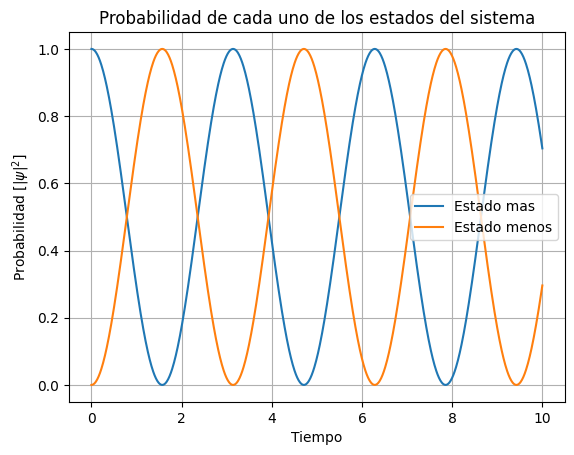

In [5]:
# Realizo el mismo procedimiento pero para varios tiempos 
prob_mas = []
prob_menos = []

for i in t:
    # Evaluación del estado temporal
    temporal_uno = np.exp(-1j*energia_uno*i/hbar)
    temporal_dos = np.exp(-1j*energia_dos*i/hbar)
    # Calculo del operador temporal en el tiempo t
    operador_temporal = np.vstack([temporal_uno*estado_uno, temporal_dos*estado_dos])
    # Calculo de la evolución temporal en el tiempo t de cada uno de los estados del sistema
    evolucion_temporal_mas = operador_temporal @ estado_mas
    evolucion_temporal_menos = operador_temporal @ estado_menos
    # Calculo de la probabilidad de cada uno de los sistemas
    prob_mas.append(np.abs(estado_mas.T @ evolucion_temporal_mas) ** 2)
    prob_menos.append(np.abs(estado_menos.T @ evolucion_temporal_mas) ** 2)

plt.plot(t, prob_mas, label="Estado mas")
plt.plot(t, prob_menos, label="Estado menos")
plt.title("Probabilidad de cada uno de los estados del sistema")
plt.grid(True)
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad [$|\psi|^2$]")
plt.legend()
plt.show()

# 2.

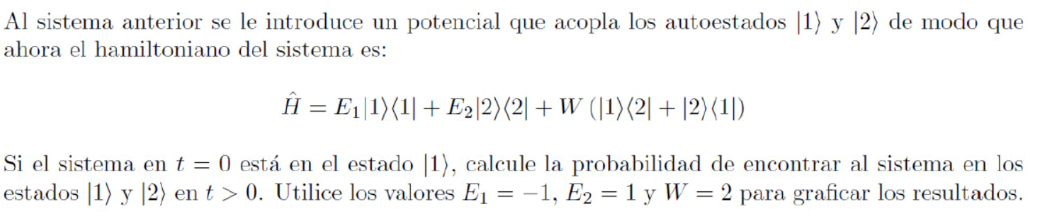

Definiendo el Hamiltoniano como: 

$\hat{H} = E_1 \ket{1}\bra{1} + E_2 \ket{2}\bra{2} + W (\ket{1}\bra{2} + \ket{2}\bra{1})$

Se va a diagonalizar la matriz del Hamiltoniano para poder realizar la evolución temporal de los estados $\ket{1}$ y $\ket{2}$. La matriz del Hamiltoniano es de la forma:

$ \hat{H} = \begin{bmatrix}
E_1 & W \\
W & E_2
\end{bmatrix}$

In [6]:
matriz_h = np.array([
    [-1, 2],
    [2, 1]
])

autovalores, autovectores = np.linalg.eig(matriz_h)

print("Autovalores:")
print(autovalores)

print("\nAutovectores:")
print(autovectores)

Autovalores:
[-2.23606798  2.23606798]

Autovectores:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


Encontremos los autoestados y autovectores del nuevo Hamiltoniano para poder expresar los estados $\ket{1}$ y $\ket{2}$ como combinacion lineal de estos autoestados 

Para encontrar los coeficientes que nos representan los estados $\ket{1}$ y $\ket{2}$ en la nueva base, tenemos que resolver:

$\vec{c} = B^{-1} \ket{1}$

In [7]:
# Cambio de base de los estados del sistema
cambio_base =  autovectores

# Calculo de los nuevos coeficientes de los estados uno y dos en la nueva base
coeficientes_nuevo_uno = np.linalg.inv(cambio_base) @ estado_uno
coeficientes_nuevo_dos = np.linalg.inv(cambio_base) @ estado_dos

print(f"Los coeficientes en el cambio de base para el estado uno son: {coeficientes_nuevo_uno}")
print(f"Los coeficientes en el cambio de base para el estado dos son: {coeficientes_nuevo_dos}")

nuevo_estado_uno = coeficientes_nuevo_uno @ cambio_base
print(f"El estado uno con la nueva base es: {nuevo_estado_uno}")

nuevo_estado_dos = coeficientes_nuevo_dos @ cambio_base
print(f"El estado dos con la nueva base es: {nuevo_estado_dos}")

Los coeficientes en el cambio de base para el estado uno son: [-0.85065081 -0.52573111]
Los coeficientes en el cambio de base para el estado dos son: [ 0.52573111 -0.85065081]
El estado uno con la nueva base es: [0.4472136  0.89442719]
El estado dos con la nueva base es: [-0.89442719  0.4472136 ]


<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
C:\Users\samhu\AppData\Local\Temp\ipykernel_21188\353287184.py:22: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Probabilidad [$|\psi|^2$]")


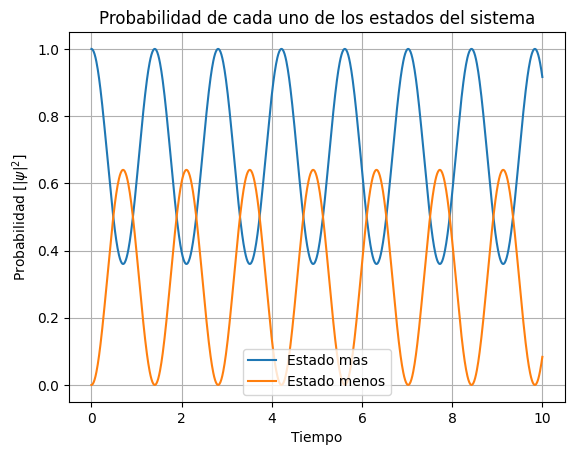

In [8]:
# Realizo el mismo procedimiento pero para varios tiempos 
prob_uno = []
prob_dos = []

for i in t:
    # Evolución temporal de los autoestados
    nuevo_temporal_uno = np.exp(-1j*autovalores[0]*i/hbar)
    nuevo_temporal_dos = np.exp(-1j*autovalores[1]*i/hbar)
    # Calculo del operador temporal en el tiempo t -> dado por los autovalores en la nueva base
    operador_temporal = [[nuevo_temporal_uno, 0], [0, nuevo_temporal_dos]]
    # Calculo de la evolución temporal en el tiempo t para el estado uno
    evolucion_temporal_uno = operador_temporal @ nuevo_estado_uno
    # Calculo de la probabilidad de cada uno de los sistemas
    prob_uno.append(np.abs(nuevo_estado_uno.T @ evolucion_temporal_uno) ** 2)
    prob_dos.append(np.abs(nuevo_estado_dos.T @ evolucion_temporal_uno) ** 2)

plt.plot(t, prob_uno, label="Estado mas")
plt.plot(t, prob_dos, label="Estado menos")
plt.title("Probabilidad de cada uno de los estados del sistema")
plt.grid(True)
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad [$|\psi|^2$]")
plt.legend()
plt.show()

